In [1]:
##########################
##--Importing packages--##
##########################
import os, cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

from keras import backend as K
K.set_image_dim_ordering('th')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam

D:\Anaconda\envs\Python3.6\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


Loaded the images of dataset-01_TUMOR

Loaded the images of dataset-02_STROMA

Loaded the images of dataset-03_COMPLEX

Loaded the images of dataset-04_LYMPHO

Loaded the images of dataset-05_DEBRIS

Loaded the images of dataset-06_MUCOSA

Loaded the images of dataset-07_ADIPOSE

Loaded the images of dataset-08_EMPTY

5000
(150, 150)


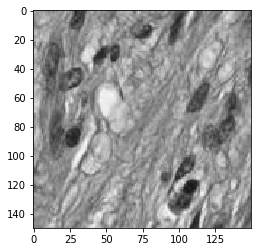

In [3]:
####################
##--Loading Data--##
####################
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
PATH = os.getcwd()
# Define data path
data_path = "D:\\Galaxy CNN\\Cancer\\Kather_texture_2016_image_tiles_5000\\Converted Data\\"
data_dir_list = os.listdir(data_path)

img_rows=150
img_cols=150
num_channel=1
num_epoch=20
num_classes = 8

img_data_list=[]


for dataset in data_dir_list:
    count=0
    img_list=os.listdir(data_path+'\\'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        count+=1
        input_img=cv2.imread(data_path + '\\'+ dataset + '\\'+ img )
        if count==1:
            #input=mpimg.imread(data_path + '/'+ dataset + '/'+ img)
            imgplt=plt.imshow(input_img)
            #print(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(150,150))
        img_data_list.append(input_img_resize)

input_img=cv2.imread('D:\\Galaxy CNN\\Cancer\\Kather_texture_2016_image_tiles_5000\\Converted Data\\02_STROMA\\10A1B_CRC-Prim-HE-02_029._Row_901_Col_751.JPEG' )        
imgplt=plt.imshow(input_img)
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape[0])
print (img_data[0].shape)

In [4]:

if num_channel==1:
	if K.image_dim_ordering()=='th':
		img_data= np.expand_dims(img_data, axis=1) 
		print (img_data.shape)
	else:
		img_data= np.expand_dims(img_data, axis=4) 
		print (img_data.shape)
		
else:
	if K.image_dim_ordering()=='th':
		img_data=np.rollaxis(img_data,3,1)
		print (img_data.shape)
		
#%%

(5000, 1, 150, 150)


In [5]:
#############################################
##--Preparing The Data Shuffle and Assign--##
#############################################

# Assigning Labels

# Define the number of classes
num_classes = 8

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:624]=0
labels[625:1249]=1
labels[1250:1875]=2
labels[1875:2499]=3
labels[2500:3124]=4
labels[3125:3749]=5
labels[3750:4374]=6
labels[4375:]=7
	  
names = ['TUMOR','STROMA','COMPLEX','LYMPHO','DEBRIS',' MUCOSA','ADIPOSE','EMPTY']
	  
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)
print('Data has been Labeled')
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
print('Data has been Shuffled')
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

Data has been Labeled
Data has been Shuffled


In [16]:
##########################
##--Defining the Model--##
##########################

# Defining the model
input_shape=img_data[0].shape
num_epoch=40
					
model = Sequential()

model.add(Convolution2D(32, 3,3,border_mode='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])
# Viewing model_configuration

model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape			
model.layers[0].output_shape			
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

#%%
# Training
hist = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test))

#hist = model.fit(X_train, y_train, batch_size=32, nb_epoch=20,verbose=1, validation_split=0.2)


D:\Anaconda\envs\Python3.6\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(1, 150, 1..., padding="same")`
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda\envs\Python3.6\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  del sys.path[0]
D:\Anaconda\envs\Python3.6\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 150, 150)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 150, 150)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 148, 148)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 148, 148)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 74, 74)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 74, 74)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 72, 72)        18496     
__________

True

In [12]:
fname = 'Cancer-CNN.h5'
model.save(fname,overwrite=True)

NameError: name 'model' is not defined

In [6]:
from keras.models import load_model
fname = 'Cancer-CNN.h5'
model=load_model('Cancer-CNN.h5')

(150, 150)
(1, 1, 150, 150)
TUMOR


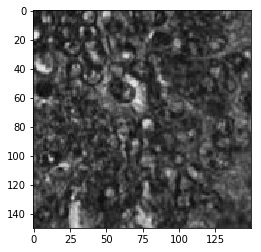

In [7]:
#5DE1_CRC-Prim-HE-02_034.tif_Row_151_Col_1.tif"
#data_p='D:\\Galaxy CNN\\Cancer\\Kather_texture_2016_image_tiles_5000\\Converted Data\\03_COMPLEX'
#datas='03_COMPLEX'
#img='1ECE_CRC-Prim-HE-06_006._Row_301_Col_601.JPEG'
test_image=cv2.imread('D:\\Galaxy CNN\\Cancer\Kather_texture_2016_image_tiles_5000\\Converted Data\\01_TUMOR\\7AC8_CRC-Prim-HE-09_010._Row_151_Col_751.JPEG')
imgplt=plt.imshow(test_image)
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(150,150))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)
if num_channel==1:
	if K.image_dim_ordering()=='th':
		test_image= np.expand_dims(test_image, axis=0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=3) 
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
else:
	if K.image_dim_ordering()=='th':
		test_image=np.rollaxis(test_image,2,0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)

# Predicting the test image
if model.predict_classes(test_image)==0:
    print("TUMOR")
elif model.predict_classes(test_image)==1:
    print("STROMA")
elif model.predict_classes(test_image)==2:
    print("COMPLEX")
elif model.predict_classes(test_image)==3:
    print("LYMPHO")
elif model.predict_classes(test_image)==4:
    print("DEBRIS")
elif model.predict_classes(test_image)==5:
    print("MUCOSA")
elif model.predict_classes(test_image)==6:
    print("ADIPOSE")
elif model.predict_classes(test_image)==7:
    print("EMPTY")

(1, 1, 32, 148, 148)
(32, 148, 148)
(148, 148, 32)


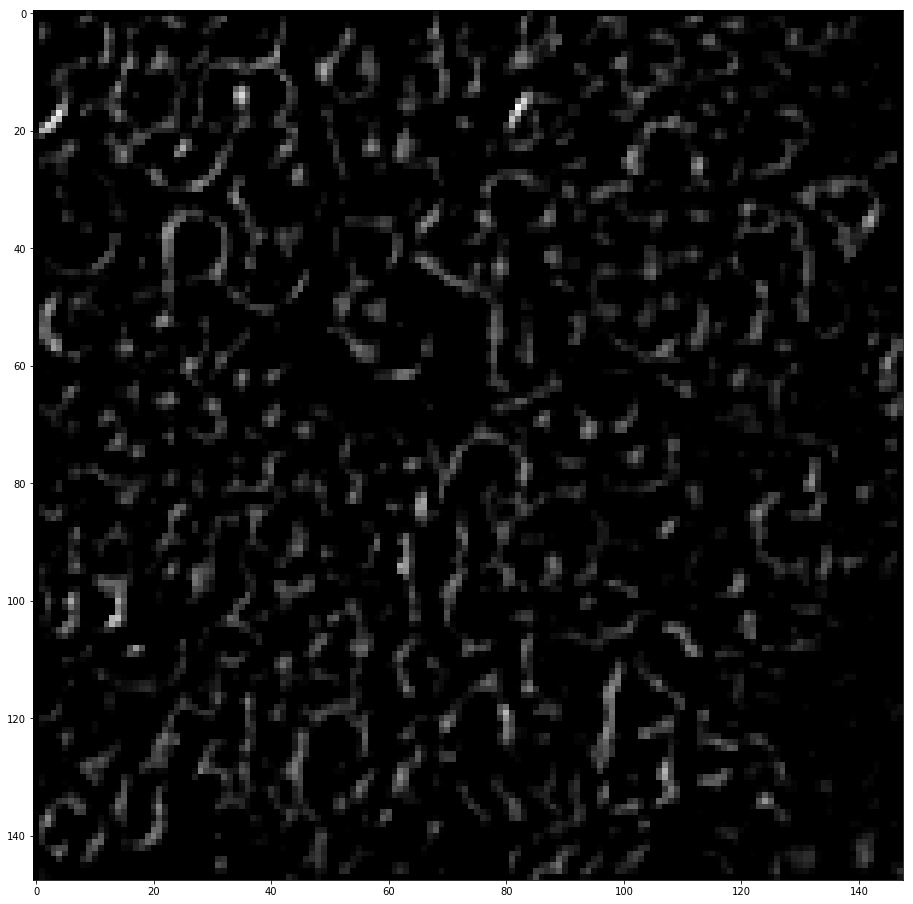

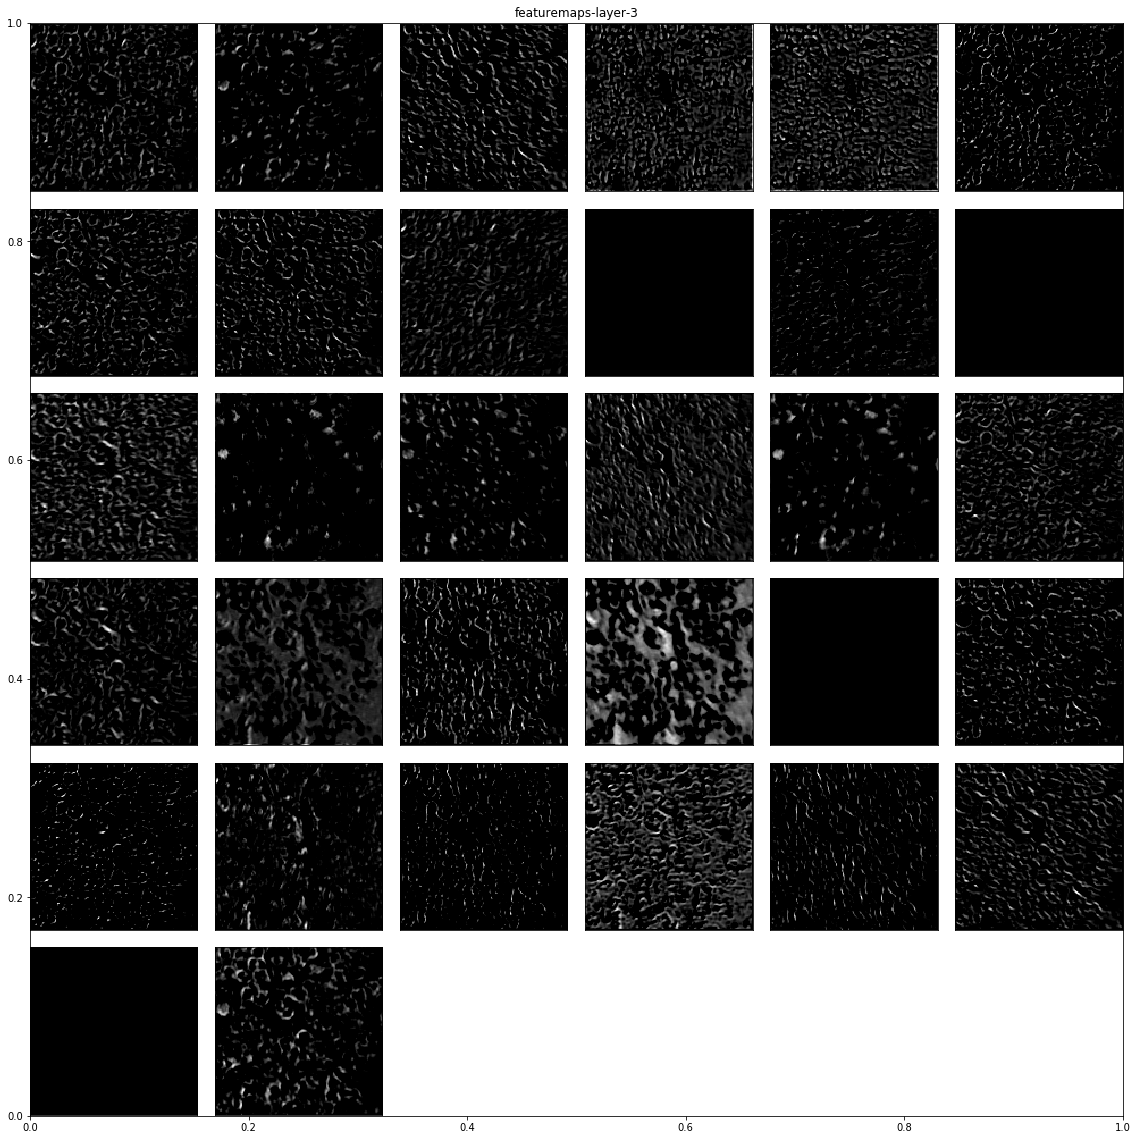

In [8]:
# Visualizing the intermediate layer
#
def get_featuremaps(model, layer_idx, X_batch):
	get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
	activations = get_activations([X_batch,0])
	return activations

layer_num=3
filter_num=0

activations = get_featuremaps(model, int(layer_num),test_image)

print (np.shape(activations))
feature_maps = activations[0][0]      
print (np.shape(feature_maps))

if K.image_dim_ordering()=='th':
	feature_maps=np.rollaxis((np.rollaxis(feature_maps,2,0)),2,0)
print (feature_maps.shape)

fig=plt.figure(figsize=(16,16))
plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.jpg')

num_of_featuremaps=feature_maps.shape[2]
fig=plt.figure(figsize=(16,16))	
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
for i in range(int(num_of_featuremaps)):
	ax = fig.add_subplot(subplot_num, subplot_num, i+1)
	#ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
	ax.imshow(feature_maps[:,:,i],cmap='gray')
	plt.xticks([])
	plt.yticks([])
	plt.tight_layout()
plt.show()
fig.savefig("featuremaps-layer-{}".format(layer_num) + '.tif')

In [1]:
from keras import __version__ as tf_keras_version
print(tf_keras_version)

Using TensorFlow backend.


2.2.4


In [9]:
import tensorflowjs as tfjs
import keras 
model==load_model('Cancer-CNN.h5')
tfjs.converters.save_keras_model(model,'D:\Galaxy CNN\JavaScript')